In [2]:
import os
print(os.getcwd())

C:\Users\dkast\ANA 500\Data


In [92]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [10]:
# load the data

cat = pd.read_csv('data_categorical.csv')
numeric = pd.read_csv('data_numeric.csv')
ordinal = pd.read_csv('data_ordinal.csv')

In [5]:
def load_data(data_folder='.'):
    """
    Loads categorical, numeric, and ordinal datasets from a specified folder.
    
    Parameters:
        data_folder (str): Relative path to the folder containing the CSV files.
        
    Returns:
        cat (DataFrame): Categorical data
        numeric (DataFrame): Numeric data
        ordinal (DataFrame): Ordinal data
    """
    base_path = os.path.abspath(data_folder)
    
    cat = pd.read_csv(os.path.join(base_path, 'data_categorical.csv'))
    numeric = pd.read_csv(os.path.join(base_path, 'data_numeric.csv'))
    ordinal = pd.read_csv(os.path.join(base_path, 'data_ordinal.csv'))
    
    return cat, numeric, ordinal

cat, numeric, ordinal = load_data()

# Quick Inspection
print(f"Categorical shape: {cat.shape}")
print(f"Numeric shape: {numeric.shape}")
print(f"Ordinal shape: {ordinal.shape}")

# Optional: Preview first few rows
show_preview = True
if show_preview:
    display(cat.head())
    display(numeric.head())
    display(ordinal.head())

Categorical shape: (5000, 23)
Numeric shape: (5000, 6)
Ordinal shape: (5000, 11)


,PERSONID,DIABETE3,_RACE,MSCODE,FLUSHOT6,EMPLOY1,SEX,MARITAL,CVDCRHD4,HLTHCVR1,...,ADDEPEV2,RENTHOM1,EXERANY2,BLIND,DECIDE,HLTHPLN1,DIABETE3.1,_STATE,ASTHMA3,MARITAL.1
0,355467,3.0,2.0,NaN,2.0,1.0,1.0,6.0,2.0,7.0,...,2.0,2.0,1.0,2.0,2.0,1.0,3.0,44.0,2.0,6.0
1,117235,3.0,1.0,5.0,1.0,7.0,2.0,3.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,1.0,3.0,19.0,2.0,3.0
2,268614,3.0,1.0,1.0,1.0,7.0,2.0,3.0,2.0,3.0,...,2.0,1.0,1.0,2.0,2.0,1.0,3.0,33.0,2.0,3.0
3,332821,3.0,4.0,NaN,2.0,1.0,1.0,1.0,2.0,NaN,...,2.0,2.0,1.0,2.0,2.0,1.0,3.0,40.0,2.0,1.0
4,348522,3.0,1.0,NaN,1.0,1.0,2.0,1.0,2.0,1.0,...,2.0,1.0,1.0,2.0,2.0,1.0,3.0,42.0,2.0,1.0


,PERSONID,DIABETE3,NUMADULT,CHILDREN,WEIGHT2,DRVISITS
0,355467,3.0,NaN,2.0,180.0,6.0
1,117235,3.0,1.0,88.0,160.0,2.0
2,268614,3.0,1.0,88.0,120.0,2.0
3,332821,3.0,NaN,88.0,160.0,NaN
4,348522,3.0,NaN,88.0,129.0,1.0


,PERSONID,DIABETE3,GENHLTH,_AGEG5YR,_BMI5CAT,CHECKUP1,INCOME2,_EDUCAG,SLEPTIM1,MENTHLTH,_SMOKER3
0,355467,3.0,1.0,6.0,3.0,3.0,3.0,3.0,6.0,88.0,4.0
1,117235,3.0,1.0,10.0,3.0,1.0,4.0,2.0,7.0,88.0,4.0
2,268614,3.0,2.0,12.0,2.0,1.0,3.0,2.0,8.0,2.0,4.0
3,332821,3.0,2.0,3.0,2.0,1.0,8.0,4.0,6.0,15.0,3.0
4,348522,3.0,2.0,9.0,2.0,2.0,8.0,3.0,7.0,88.0,4.0


In [8]:
cat.head()

,PERSONID,DIABETE3,_RACE,MSCODE,FLUSHOT6,EMPLOY1,SEX,MARITAL,CVDCRHD4,HLTHCVR1,...,ADDEPEV2,RENTHOM1,EXERANY2,BLIND,DECIDE,HLTHPLN1,DIABETE3.1,_STATE,ASTHMA3,MARITAL.1
0,355467,3.0,2.0,NaN,2.0,1.0,1.0,6.0,2.0,7.0,...,2.0,2.0,1.0,2.0,2.0,1.0,3.0,44.0,2.0,6.0
1,117235,3.0,1.0,5.0,1.0,7.0,2.0,3.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,1.0,3.0,19.0,2.0,3.0
2,268614,3.0,1.0,1.0,1.0,7.0,2.0,3.0,2.0,3.0,...,2.0,1.0,1.0,2.0,2.0,1.0,3.0,33.0,2.0,3.0
3,332821,3.0,4.0,NaN,2.0,1.0,1.0,1.0,2.0,NaN,...,2.0,2.0,1.0,2.0,2.0,1.0,3.0,40.0,2.0,1.0
4,348522,3.0,1.0,NaN,1.0,1.0,2.0,1.0,2.0,1.0,...,2.0,1.0,1.0,2.0,2.0,1.0,3.0,42.0,2.0,1.0


In [9]:
numeric.head()

,PERSONID,DIABETE3,NUMADULT,CHILDREN,WEIGHT2,DRVISITS
0,355467,3.0,NaN,2.0,180.0,6.0
1,117235,3.0,1.0,88.0,160.0,2.0
2,268614,3.0,1.0,88.0,120.0,2.0
3,332821,3.0,NaN,88.0,160.0,NaN
4,348522,3.0,NaN,88.0,129.0,1.0


In [10]:
ordinal.head()

,PERSONID,DIABETE3,GENHLTH,_AGEG5YR,_BMI5CAT,CHECKUP1,INCOME2,_EDUCAG,SLEPTIM1,MENTHLTH,_SMOKER3
0,355467,3.0,1.0,6.0,3.0,3.0,3.0,3.0,6.0,88.0,4.0
1,117235,3.0,1.0,10.0,3.0,1.0,4.0,2.0,7.0,88.0,4.0
2,268614,3.0,2.0,12.0,2.0,1.0,3.0,2.0,8.0,2.0,4.0
3,332821,3.0,2.0,3.0,2.0,1.0,8.0,4.0,6.0,15.0,3.0
4,348522,3.0,2.0,9.0,2.0,2.0,8.0,3.0,7.0,88.0,4.0


In [11]:
print ("Shape of Catetgorical Data:", cat.shape)
cat.info()

Shape of Catetgorical Data: (5000, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PERSONID    5000 non-null   int64  
 1   DIABETE3    5000 non-null   float64
 2   _RACE       4997 non-null   float64
 3   MSCODE      3187 non-null   float64
 4   FLUSHOT6    4762 non-null   float64
 5   EMPLOY1     4981 non-null   float64
 6   SEX         5000 non-null   float64
 7   MARITAL     4990 non-null   float64
 8   CVDCRHD4    5000 non-null   float64
 9   HLTHCVR1    3318 non-null   float64
 10  CHCKIDNY    5000 non-null   float64
 11  USEEQUIP    4837 non-null   float64
 12  _TOTINDA    5000 non-null   float64
 13  ADDEPEV2    5000 non-null   float64
 14  RENTHOM1    4898 non-null   float64
 15  EXERANY2    5000 non-null   float64
 16  BLIND       4830 non-null   float64
 17  DECIDE      4829 non-null   float64
 18  HLTHPLN1    5000 non-null   f

In [12]:
print ("Shape of Numeric Data:", numeric.shape)
numeric.info()

Shape of Numeric Data: (5000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERSONID  5000 non-null   int64  
 1   DIABETE3  5000 non-null   float64
 2   NUMADULT  3240 non-null   float64
 3   CHILDREN  4988 non-null   float64
 4   WEIGHT2   4950 non-null   float64
 5   DRVISITS  3567 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 234.5 KB


In [13]:
print ("Shape of Ordinal Data:", ordinal.shape)
ordinal.info()

Shape of Ordinal Data: (5000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERSONID  5000 non-null   int64  
 1   DIABETE3  5000 non-null   float64
 2   GENHLTH   5000 non-null   float64
 3   _AGEG5YR  5000 non-null   float64
 4   _BMI5CAT  4681 non-null   float64
 5   CHECKUP1  5000 non-null   float64
 6   INCOME2   4962 non-null   float64
 7   _EDUCAG   5000 non-null   float64
 8   SLEPTIM1  5000 non-null   float64
 9   MENTHLTH  5000 non-null   float64
 10  _SMOKER3  5000 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 429.8 KB


In [14]:
#identify just the columns wiht missing data

cat.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)

MSCODE       1813
HLTHCVR1     1682
FLUSHOT6      238
DECIDE        171
BLIND         170
USEEQUIP      163
RENTHOM1      102
EMPLOY1        19
MARITAL        10
MARITAL.1      10
_RACE           3
dtype: int64

In [15]:
numeric.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)

NUMADULT    1760
DRVISITS    1433
WEIGHT2       50
CHILDREN      12
dtype: int64

In [16]:
ordinal.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)

_BMI5CAT    319
INCOME2      38
dtype: int64

In [17]:
# Merge all three on PERSONID

combined = cat.merge(numeric, on='PERSONID') \
              .merge(ordinal, on='PERSONID')

In [18]:
combined.shape

(5000, 38)

In [19]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PERSONID    5000 non-null   int64  
 1   DIABETE3_x  5000 non-null   float64
 2   _RACE       4997 non-null   float64
 3   MSCODE      3187 non-null   float64
 4   FLUSHOT6    4762 non-null   float64
 5   EMPLOY1     4981 non-null   float64
 6   SEX         5000 non-null   float64
 7   MARITAL     4990 non-null   float64
 8   CVDCRHD4    5000 non-null   float64
 9   HLTHCVR1    3318 non-null   float64
 10  CHCKIDNY    5000 non-null   float64
 11  USEEQUIP    4837 non-null   float64
 12  _TOTINDA    5000 non-null   float64
 13  ADDEPEV2    5000 non-null   float64
 14  RENTHOM1    4898 non-null   float64
 15  EXERANY2    5000 non-null   float64
 16  BLIND       4830 non-null   float64
 17  DECIDE      4829 non-null   float64
 18  HLTHPLN1    5000 non-null   float64
 19  DIABETE3.1  5000 non-null  

In [20]:
missing_summary = combined.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)
print(missing_summary)

MSCODE       1813
NUMADULT     1760
HLTHCVR1     1682
DRVISITS     1433
_BMI5CAT      319
FLUSHOT6      238
DECIDE        171
BLIND         170
USEEQUIP      163
RENTHOM1      102
WEIGHT2        50
INCOME2        38
EMPLOY1        19
CHILDREN       12
MARITAL.1      10
MARITAL        10
_RACE           3
dtype: int64


In [21]:
# Check if all columns exist
combined[['DIABETE3', 'DIABETE3_x', 'DIABETE3_y', 'DIABETE3.1']].info()

# Compare value distributions
for col in ['DIABETE3', 'DIABETE3_x', 'DIABETE3_y', 'DIABETE3.1']:
    print(f"\n{col} value counts:")
    print(combined[col].value_counts(dropna=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DIABETE3    5000 non-null   float64
 1   DIABETE3_x  5000 non-null   float64
 2   DIABETE3_y  5000 non-null   float64
 3   DIABETE3.1  5000 non-null   float64
dtypes: float64(4)
memory usage: 156.4 KB

DIABETE3 value counts:
DIABETE3
3.0    4251
1.0     627
4.0      76
2.0      39
9.0       5
7.0       2
Name: count, dtype: int64

DIABETE3_x value counts:
DIABETE3_x
3.0    4251
1.0     627
4.0      76
2.0      39
9.0       5
7.0       2
Name: count, dtype: int64

DIABETE3_y value counts:
DIABETE3_y
3.0    4251
1.0     627
4.0      76
2.0      39
9.0       5
7.0       2
Name: count, dtype: int64

DIABETE3.1 value counts:
DIABETE3.1
3.0    4251
1.0     627
4.0      76
2.0      39
9.0       5
7.0       2
Name: count, dtype: int64


In [22]:
combined.drop(columns=['DIABETE3_x', 'DIABETE3_y', 'DIABETE3.1'], inplace=True)

### Removed the duplicate diabetes variables

I was able to identify that the 4 diabetes variables are the same so I removed the 3 that did not match the code book. 

In [23]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PERSONID   5000 non-null   int64  
 1   _RACE      4997 non-null   float64
 2   MSCODE     3187 non-null   float64
 3   FLUSHOT6   4762 non-null   float64
 4   EMPLOY1    4981 non-null   float64
 5   SEX        5000 non-null   float64
 6   MARITAL    4990 non-null   float64
 7   CVDCRHD4   5000 non-null   float64
 8   HLTHCVR1   3318 non-null   float64
 9   CHCKIDNY   5000 non-null   float64
 10  USEEQUIP   4837 non-null   float64
 11  _TOTINDA   5000 non-null   float64
 12  ADDEPEV2   5000 non-null   float64
 13  RENTHOM1   4898 non-null   float64
 14  EXERANY2   5000 non-null   float64
 15  BLIND      4830 non-null   float64
 16  DECIDE     4829 non-null   float64
 17  HLTHPLN1   5000 non-null   float64
 18  _STATE     5000 non-null   float64
 19  ASTHMA3    5000 non-null   float64
 20  MARITAL.

In [24]:
# Focus on the MSCODE for now there is 36 % missing and the code book says missing could be an answer. 

missing_by_state = combined.loc[combined['MSCODE'].isna(), '_STATE'].value_counts()
print(missing_by_state)

_STATE
31.0    110
49.0     88
27.0     82
48.0     59
20.0     59
72.0     52
26.0     51
15.0     50
8.0      50
37.0     47
42.0     46
6.0      45
35.0     42
1.0      39
50.0     39
25.0     38
40.0     38
53.0     37
4.0      37
45.0     37
51.0     36
46.0     35
66.0     34
34.0     33
18.0     32
19.0     29
39.0     29
12.0     29
33.0     28
55.0     28
41.0     27
9.0      27
22.0     25
29.0     25
54.0     24
38.0     23
21.0     23
13.0     23
36.0     23
44.0     22
10.0     22
23.0     21
17.0     20
16.0     19
47.0     18
28.0     18
24.0     18
2.0      17
5.0      17
30.0     16
11.0     10
32.0     10
56.0      6
Name: count, dtype: int64


In [25]:
# Step 1: Build a state-to-mode map from non-missing MSCODE values
state_mode_map = combined.dropna(subset=['MSCODE']) \
    .groupby('_STATE')['MSCODE'].agg(lambda x: x.mode().iloc[0])

national_mode = combined['MSCODE'].mode()[0]

# Step 2: Fill using state-wise mode, fallback to national mode
combined['MSCODE_imputed'] = combined['MSCODE']
combined.loc[combined['MSCODE'].isna(), 'MSCODE_imputed'] = \
    combined.loc[combined['MSCODE'].isna(), '_STATE'].map(state_mode_map).fillna(national_mode)


In [26]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PERSONID        5000 non-null   int64  
 1   _RACE           4997 non-null   float64
 2   MSCODE          3187 non-null   float64
 3   FLUSHOT6        4762 non-null   float64
 4   EMPLOY1         4981 non-null   float64
 5   SEX             5000 non-null   float64
 6   MARITAL         4990 non-null   float64
 7   CVDCRHD4        5000 non-null   float64
 8   HLTHCVR1        3318 non-null   float64
 9   CHCKIDNY        5000 non-null   float64
 10  USEEQUIP        4837 non-null   float64
 11  _TOTINDA        5000 non-null   float64
 12  ADDEPEV2        5000 non-null   float64
 13  RENTHOM1        4898 non-null   float64
 14  EXERANY2        5000 non-null   float64
 15  BLIND           4830 non-null   float64
 16  DECIDE          4829 non-null   float64
 17  HLTHPLN1        5000 non-null   f

In [27]:
missing_summary = combined.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)
print(missing_summary)

MSCODE       1813
NUMADULT     1760
HLTHCVR1     1682
DRVISITS     1433
_BMI5CAT      319
FLUSHOT6      238
DECIDE        171
BLIND         170
USEEQUIP      163
RENTHOM1      102
WEIGHT2        50
INCOME2        38
EMPLOY1        19
CHILDREN       12
MARITAL.1      10
MARITAL        10
_RACE           3
dtype: int64


In [28]:
#impute number of adults using knn and the 'CHILDREN', 'INCOME2', 'RENTHOM1', 'MSCODE_imputed', '_STATE' variables

knn_features = ['CHILDREN', 'INCOME2', 'RENTHOM1', 'MSCODE_imputed', '_STATE']
knn_data = combined[knn_features + ['NUMADULT']]

knn_imputer = KNNImputer(n_neighbors=5)
imputed_array = knn_imputer.fit_transform(knn_data)

combined['NUMADULT_imputed'] = imputed_array[:, -1].round()

In [29]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PERSONID          5000 non-null   int64  
 1   _RACE             4997 non-null   float64
 2   MSCODE            3187 non-null   float64
 3   FLUSHOT6          4762 non-null   float64
 4   EMPLOY1           4981 non-null   float64
 5   SEX               5000 non-null   float64
 6   MARITAL           4990 non-null   float64
 7   CVDCRHD4          5000 non-null   float64
 8   HLTHCVR1          3318 non-null   float64
 9   CHCKIDNY          5000 non-null   float64
 10  USEEQUIP          4837 non-null   float64
 11  _TOTINDA          5000 non-null   float64
 12  ADDEPEV2          5000 non-null   float64
 13  RENTHOM1          4898 non-null   float64
 14  EXERANY2          5000 non-null   float64
 15  BLIND             4830 non-null   float64
 16  DECIDE            4829 non-null   float64


In [30]:
# Impute HLTHCVR1

#binary indicator for coverage

combined['hlth_coverage'] = combined['HLTHPLN1'].replace({1: 1, 2: 0, 7: np.nan, 9: np.nan})

In [31]:
# Impute 'None' for those who report no coverage
combined.loc[
    (combined['HLTHCVR1'].isna()) & (combined['hlth_coverage'] == 0),
    'HLTHCVR1'
] = 8

In [32]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PERSONID          5000 non-null   int64  
 1   _RACE             4997 non-null   float64
 2   MSCODE            3187 non-null   float64
 3   FLUSHOT6          4762 non-null   float64
 4   EMPLOY1           4981 non-null   float64
 5   SEX               5000 non-null   float64
 6   MARITAL           4990 non-null   float64
 7   CVDCRHD4          5000 non-null   float64
 8   HLTHCVR1          3677 non-null   float64
 9   CHCKIDNY          5000 non-null   float64
 10  USEEQUIP          4837 non-null   float64
 11  _TOTINDA          5000 non-null   float64
 12  ADDEPEV2          5000 non-null   float64
 13  RENTHOM1          4898 non-null   float64
 14  EXERANY2          5000 non-null   float64
 15  BLIND             4830 non-null   float64
 16  DECIDE            4829 non-null   float64


In [33]:
knn_features = ['_AGEG5YR', 'INCOME2', '_EDUCAG', 'MSCODE_imputed', 'hlth_coverage']
knn_data = combined[knn_features + ['HLTHCVR1']]

knn_imputer = KNNImputer(n_neighbors=5)
imputed_array = knn_imputer.fit_transform(knn_data)

combined['HLTHCVR1_imputed'] = imputed_array[:, -1].round()

In [34]:
#impute DRVISITS

# Step 1: Build median DRVISITS by CHECKUP1 category
visit_map = combined.groupby('CHECKUP1')['DRVISITS'].median()

# Step 2: Impute missing DRVISITS using CHECKUP1
combined['DRVISITS_imputed'] = combined['DRVISITS']
combined.loc[combined['DRVISITS'].isna(), 'DRVISITS_imputed'] = \
    combined.loc[combined['DRVISITS'].isna(), 'CHECKUP1'].map(visit_map)

In [35]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PERSONID          5000 non-null   int64  
 1   _RACE             4997 non-null   float64
 2   MSCODE            3187 non-null   float64
 3   FLUSHOT6          4762 non-null   float64
 4   EMPLOY1           4981 non-null   float64
 5   SEX               5000 non-null   float64
 6   MARITAL           4990 non-null   float64
 7   CVDCRHD4          5000 non-null   float64
 8   HLTHCVR1          3677 non-null   float64
 9   CHCKIDNY          5000 non-null   float64
 10  USEEQUIP          4837 non-null   float64
 11  _TOTINDA          5000 non-null   float64
 12  ADDEPEV2          5000 non-null   float64
 13  RENTHOM1          4898 non-null   float64
 14  EXERANY2          5000 non-null   float64
 15  BLIND             4830 non-null   float64
 16  DECIDE            4829 non-null   float64


In [36]:
#Use KNN to impute the smaller nan variables '_BMI5CAT', 'FLUSHOT6', 'RENTHOM1', 'INCOME2', 'EMPLOY1'

# Step 1: Select features for KNN imputation
knn_features = [
    '_AGEG5YR', 'SEX', 'EXERANY2', 'WEIGHT2', 'CHECKUP1', 'HLTHPLN1',
    'MARITAL', '_EDUCAG', '_STATE', 'MSCODE_imputed', 'NUMADULT_imputed',
    'DRVISITS_imputed'
]

# Step 2: Include target columns for imputation
target_columns = ['_BMI5CAT', 'FLUSHOT6', 'RENTHOM1', 'INCOME2', 'EMPLOY1']
impute_columns = knn_features + target_columns

# Step 3: Subset and apply KNN
knn_data = combined[impute_columns]
knn_imputer = KNNImputer(n_neighbors=5)
imputed_array = knn_imputer.fit_transform(knn_data)

# Step 4: Replace original columns with imputed values
for i, col in enumerate(impute_columns):
    if col in target_columns:
        combined[col] = imputed_array[:, i].round()  # round for categorical

for col in target_columns:
    combined[f'{col}_was_imputed'] = combined[col].isna().astype(int)


In [37]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PERSONID              5000 non-null   int64  
 1   _RACE                 4997 non-null   float64
 2   MSCODE                3187 non-null   float64
 3   FLUSHOT6              5000 non-null   float64
 4   EMPLOY1               5000 non-null   float64
 5   SEX                   5000 non-null   float64
 6   MARITAL               4990 non-null   float64
 7   CVDCRHD4              5000 non-null   float64
 8   HLTHCVR1              3677 non-null   float64
 9   CHCKIDNY              5000 non-null   float64
 10  USEEQUIP              4837 non-null   float64
 11  _TOTINDA              5000 non-null   float64
 12  ADDEPEV2              5000 non-null   float64
 13  RENTHOM1              5000 non-null   float64
 14  EXERANY2              5000 non-null   float64
 15  BLIND                

In [38]:
# see if the marital varibales match.

# Compare values directly
combined['marital_match'] = combined['MARITAL'] == combined['MARITAL.1']

# Summary of matches
match_summary = combined['marital_match'].value_counts(dropna=False)
print(match_summary)

marital_match
True     4990
False      10
Name: count, dtype: int64


In [39]:
combined['MARITAL'] = combined['MARITAL'].fillna(combined['MARITAL.1'])

In [40]:
combined.drop(columns=['MARITAL.1', 'marital_match'], inplace=True)

In [41]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PERSONID              5000 non-null   int64  
 1   _RACE                 4997 non-null   float64
 2   MSCODE                3187 non-null   float64
 3   FLUSHOT6              5000 non-null   float64
 4   EMPLOY1               5000 non-null   float64
 5   SEX                   5000 non-null   float64
 6   MARITAL               4990 non-null   float64
 7   CVDCRHD4              5000 non-null   float64
 8   HLTHCVR1              3677 non-null   float64
 9   CHCKIDNY              5000 non-null   float64
 10  USEEQUIP              4837 non-null   float64
 11  _TOTINDA              5000 non-null   float64
 12  ADDEPEV2              5000 non-null   float64
 13  RENTHOM1              5000 non-null   float64
 14  EXERANY2              5000 non-null   float64
 15  BLIND                

In [45]:
#Mode impute the remaining smaller columns. 

# Define columns to impute
mode_cols = ['DECIDE', 'BLIND', 'USEEQUIP', 'MARITAL', '_RACE', 'WEIGHT2', 'CHILDREN']

# Apply mode imputation
mode_imputer = SimpleImputer(strategy='most_frequent')
combined[mode_cols] = mode_imputer.fit_transform(combined[mode_cols])

for col in mode_cols:
    combined[f'{col}_was_imputed'] = combined[col].isna().astype(int)

In [46]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PERSONID              5000 non-null   int64  
 1   _RACE                 5000 non-null   float64
 2   MSCODE                3187 non-null   float64
 3   FLUSHOT6              5000 non-null   float64
 4   EMPLOY1               5000 non-null   float64
 5   SEX                   5000 non-null   float64
 6   MARITAL               5000 non-null   float64
 7   CVDCRHD4              5000 non-null   float64
 8   HLTHCVR1              3677 non-null   float64
 9   CHCKIDNY              5000 non-null   float64
 10  USEEQUIP              5000 non-null   float64
 11  _TOTINDA              5000 non-null   float64
 12  ADDEPEV2              5000 non-null   float64
 13  RENTHOM1              5000 non-null   float64
 14  EXERANY2              5000 non-null   float64
 15  BLIND                

In [47]:
missing_summary = combined.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)
print(missing_summary)

MSCODE           1813
NUMADULT         1760
DRVISITS         1433
HLTHCVR1         1323
hlth_coverage      20
dtype: int64


In [48]:
# Sort and display unique values
unique_weights = combined['WEIGHT2'].dropna().unique()
print(np.sort(unique_weights))

[  75.   84.   86.   87.   88.   89.   90.   92.   93.   94.   95.   96.
   98.   99.  100.  101.  102.  103.  104.  105.  106.  107.  108.  109.
  110.  111.  112.  113.  114.  115.  116.  117.  118.  119.  120.  121.
  122.  123.  124.  125.  126.  127.  128.  129.  130.  131.  132.  133.
  134.  135.  136.  137.  138.  139.  140.  141.  142.  143.  144.  145.
  146.  147.  148.  149.  150.  151.  152.  153.  154.  155.  156.  157.
  158.  159.  160.  161.  162.  163.  164.  165.  166.  167.  168.  169.
  170.  171.  172.  173.  174.  175.  176.  177.  178.  179.  180.  181.
  182.  183.  184.  185.  186.  187.  188.  189.  190.  191.  192.  193.
  194.  195.  196.  197.  198.  199.  200.  201.  202.  203.  204.  205.
  206.  207.  208.  209.  210.  211.  212.  213.  214.  215.  216.  217.
  218.  219.  220.  221.  222.  223.  224.  225.  226.  227.  228.  229.
  230.  231.  232.  233.  234.  235.  236.  237.  238.  239.  240.  241.
  242.  243.  244.  245.  246.  247.  248.  249.  2

In [49]:
# Count each unique value, including NaNs
weight_counts = combined['WEIGHT2'].value_counts(dropna=False).sort_index()
print(weight_counts)

WEIGHT2
75.0        1
84.0        1
86.0        1
87.0        1
88.0        1
         ... 
9080.0      1
9085.0      1
9120.0      1
9140.0      1
9999.0    153
Name: count, Length: 231, dtype: int64


In [50]:
# Count of special codes and missing values
count_7777 = (combined['WEIGHT2'] == 7777).sum()
count_9999 = (combined['WEIGHT2'] == 9999).sum()
count_nan   = combined['WEIGHT2'].isna().sum()

print(f"Count of 7777 (Don't know): {count_7777}")
print(f"Count of 9999 (Refused): {count_9999}")
print(f"Count of NaN (Missing): {count_nan}")

Count of 7777 (Don't know): 62
Count of 9999 (Refused): 153
Count of NaN (Missing): 0


In [51]:
# Convert all the wweights to pounds 

# Step 1: Create a copy to preserve original
combined['WEIGHT2_clean'] = combined['WEIGHT2']

# Step 2: Convert kilograms to pounds (1 kg ≈ 2.20462 lbs)
kg_mask = combined['WEIGHT2'].between(9000, 9998)
combined.loc[kg_mask, 'WEIGHT2_clean'] = combined.loc[kg_mask, 'WEIGHT2'] - 9000
combined.loc[kg_mask, 'WEIGHT2_clean'] *= 2.20462

# Step 3: Set special codes to NaN
combined.loc[combined['WEIGHT2'].isin([7777, 9999]), 'WEIGHT2_clean'] = np.nan

In [52]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PERSONID              5000 non-null   int64  
 1   _RACE                 5000 non-null   float64
 2   MSCODE                3187 non-null   float64
 3   FLUSHOT6              5000 non-null   float64
 4   EMPLOY1               5000 non-null   float64
 5   SEX                   5000 non-null   float64
 6   MARITAL               5000 non-null   float64
 7   CVDCRHD4              5000 non-null   float64
 8   HLTHCVR1              3677 non-null   float64
 9   CHCKIDNY              5000 non-null   float64
 10  USEEQUIP              5000 non-null   float64
 11  _TOTINDA              5000 non-null   float64
 12  ADDEPEV2              5000 non-null   float64
 13  RENTHOM1              5000 non-null   float64
 14  EXERANY2              5000 non-null   float64
 15  BLIND                

In [53]:
#KNN impute the remaining missing weights

knn_features = ['_AGEG5YR', 'SEX', '_BMI5CAT', 'EXERANY2']
knn_data = combined[knn_features + ['WEIGHT2_clean']]

knn_imputer = KNNImputer(n_neighbors=5)
imputed_array = knn_imputer.fit_transform(knn_data)

combined['WEIGHT2_clean'] = imputed_array[:, -1]



In [55]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PERSONID              5000 non-null   int64  
 1   _RACE                 5000 non-null   float64
 2   MSCODE                3187 non-null   float64
 3   FLUSHOT6              5000 non-null   float64
 4   EMPLOY1               5000 non-null   float64
 5   SEX                   5000 non-null   float64
 6   MARITAL               5000 non-null   float64
 7   CVDCRHD4              5000 non-null   float64
 8   HLTHCVR1              3677 non-null   float64
 9   CHCKIDNY              5000 non-null   float64
 10  USEEQUIP              5000 non-null   float64
 11  _TOTINDA              5000 non-null   float64
 12  ADDEPEV2              5000 non-null   float64
 13  RENTHOM1              5000 non-null   float64
 14  EXERANY2              5000 non-null   float64
 15  BLIND                

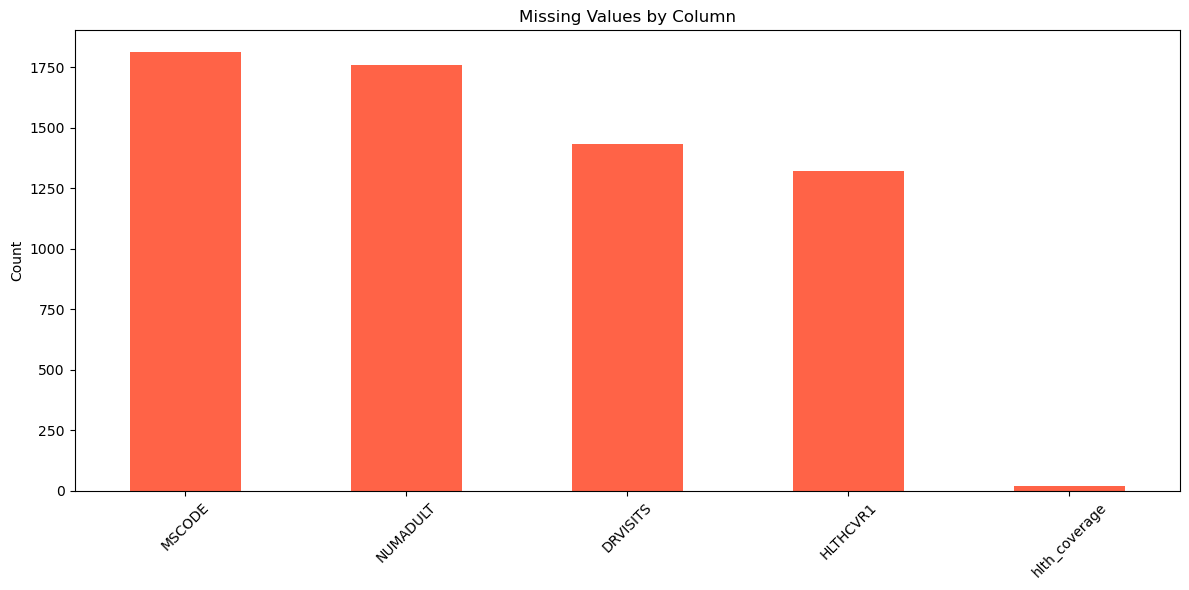

In [57]:
missing_summary = combined.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)
plt.figure(figsize=(12,6))
missing_summary.plot(kind='bar', color='tomato')
plt.title('Missing Values by Column')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> MSCODE, NUMADULT, HLTHCVR1, and DRVISITS have the most missing values. These were imputed using domain-aware strategies (state-wise mode, KNN, and conditional logic). Remaining gaps are flagged for post-EDA handling.

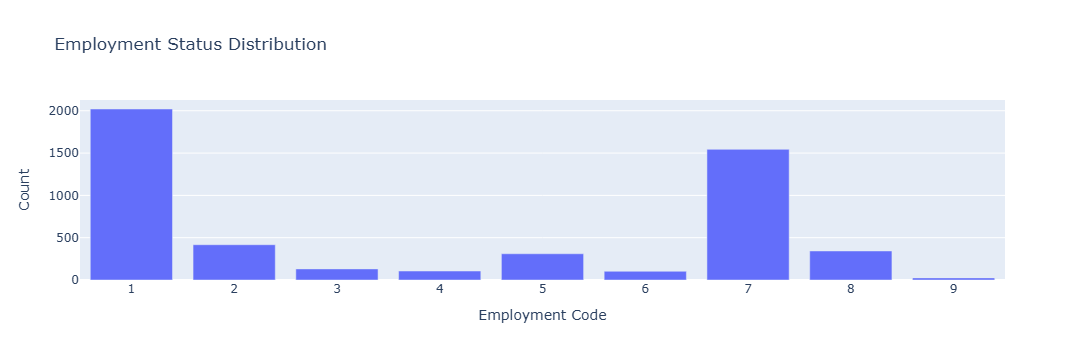

In [61]:
# Count frequencies of EMPLOY1 values
employ_counts = combined['EMPLOY1'].value_counts().reset_index()
employ_counts.columns = ['Employment Code', 'Count']

# Plot the bar chart
px.bar(employ_counts, x='Employment Code', y='Count',
       title='Employment Status Distribution')

> Employment codes 1 and 7 dominate, representing full-time workers and retirees. This variable may influence health access and lifestyle indicators.

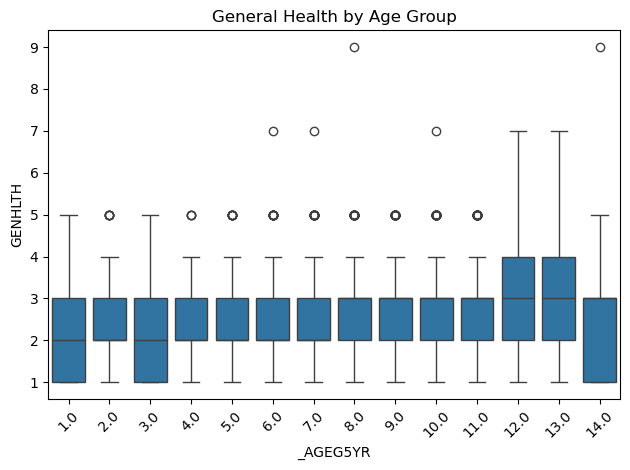

In [64]:
sns.boxplot(x='_AGEG5YR', y='GENHLTH', data=combined)
plt.title('General Health by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> **Interpretation**: Health ratings decline with age, confirming `_AGEG5YR` as a strong predictor of perceived health. GENHLTH will be retained as ordinal for interpretability.

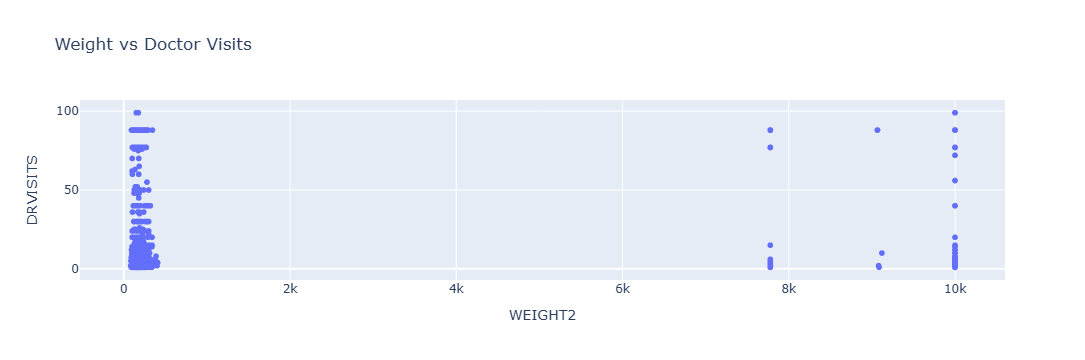

In [65]:
px.scatter(combined, x='WEIGHT2', y='DRVISITS', title='Weight vs Doctor Visits')

> **Interpretation**: Slight positive trend suggests heavier individuals may visit doctors more often. Outliers are visible but not extreme. 

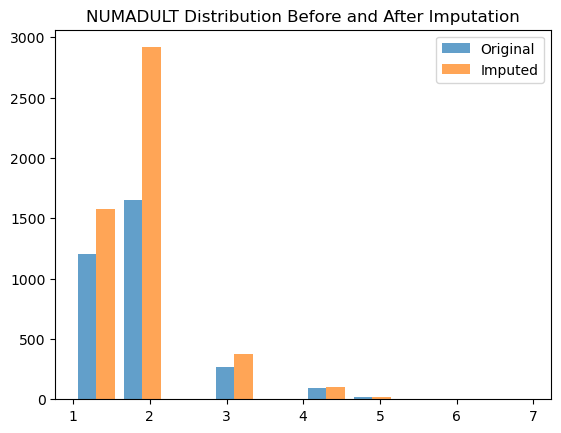

In [66]:
plt.hist([combined['NUMADULT'].dropna(), combined['NUMADULT_imputed']], 
         label=['Original', 'Imputed'], bins=10, alpha=0.7)
plt.legend()
plt.title('NUMADULT Distribution Before and After Imputation')
plt.show()

> **Interpretation**: KNN imputation preserved the original distribution shape, avoiding artificial inflation of zeros and maintaining realistic household sizes.

array([[<Axes: title={'center': 'PERSONID'}>,
        <Axes: title={'center': '_RACE'}>,
        <Axes: title={'center': 'MSCODE'}>,
        <Axes: title={'center': 'FLUSHOT6'}>,
        <Axes: title={'center': 'EMPLOY1'}>,
        <Axes: title={'center': 'SEX'}>,
        <Axes: title={'center': 'MARITAL'}>],
       [<Axes: title={'center': 'CVDCRHD4'}>,
        <Axes: title={'center': 'HLTHCVR1'}>,
        <Axes: title={'center': 'CHCKIDNY'}>,
        <Axes: title={'center': 'USEEQUIP'}>,
        <Axes: title={'center': '_TOTINDA'}>,
        <Axes: title={'center': 'ADDEPEV2'}>,
        <Axes: title={'center': 'RENTHOM1'}>],
       [<Axes: title={'center': 'EXERANY2'}>,
        <Axes: title={'center': 'BLIND'}>,
        <Axes: title={'center': 'DECIDE'}>,
        <Axes: title={'center': 'HLTHPLN1'}>,
        <Axes: title={'center': '_STATE'}>,
        <Axes: title={'center': 'ASTHMA3'}>,
        <Axes: title={'center': 'NUMADULT'}>],
       [<Axes: title={'center': 'CHILDREN'}>,
     

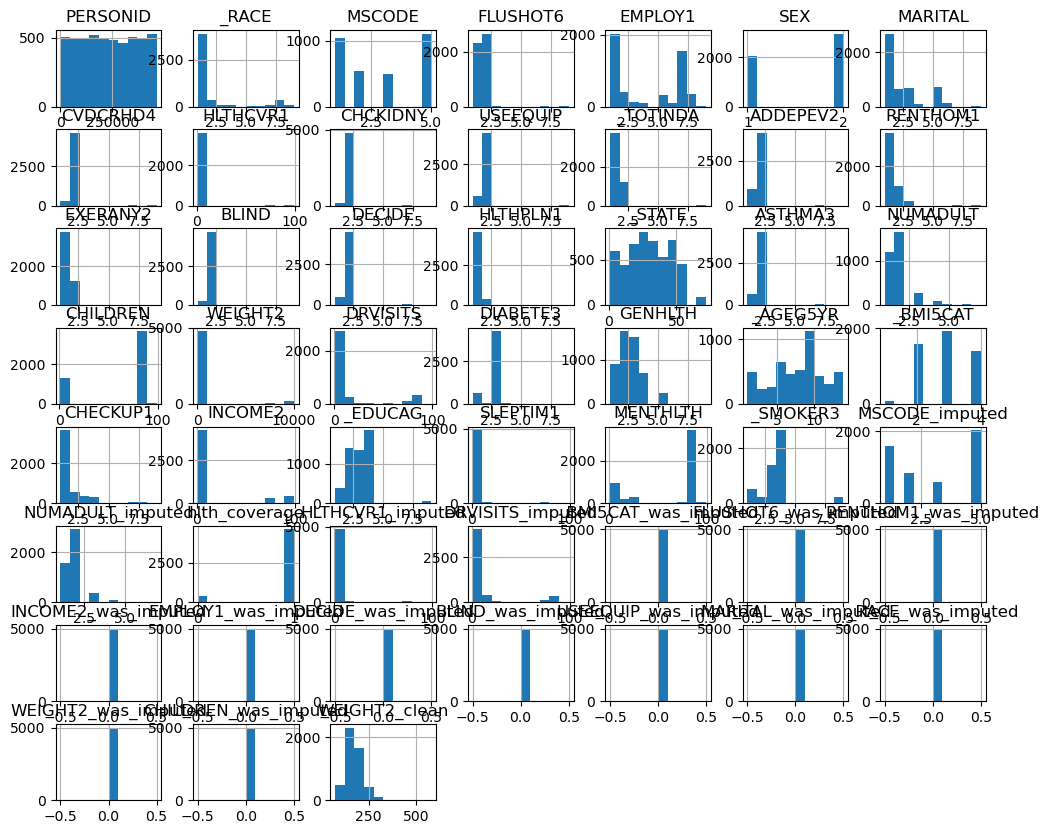

In [67]:
combined.describe(include='all')
combined.select_dtypes(include='number').hist(figsize=(12,10))

In [81]:
# Focus only on numeric columns
numeric_summary = combined.select_dtypes(include='number').describe().T

# Round for clarity
numeric_summary = numeric_summary.round(2)

# Optional: sort by standard deviation or missingness
numeric_summary = numeric_summary.sort_values(by='std', ascending=False)

# Display
display(numeric_summary)

,count,mean,std,min,25%,50%,75%,max
PERSONID,5000.0,232280.71,135330.39,13.0,115264.0,229596.0,351385.5,464529.0
WEIGHT2,5000.0,584.52,1901.58,75.0,146.0,175.0,205.0,9999.0
WEIGHT2_clean,5000.0,176.73,43.58,75.0,146.0,170.0,200.0,580.0
CHILDREN,5000.0,65.74,37.75,1.0,4.0,88.0,88.0,99.0
MENTHLTH,5000.0,65.44,35.47,1.0,30.0,88.0,88.0,99.0
INCOME2,5000.0,17.95,29.84,1.0,5.0,7.0,8.0,99.0
DRVISITS,3567.0,16.08,27.91,1.0,2.0,4.0,10.0,99.0
DRVISITS_imputed,5000.0,12.95,24.26,1.0,3.0,4.0,7.0,99.0
_STATE,5000.0,29.96,16.10,1.0,18.0,29.0,44.0,72.0
HLTHCVR1,3677.0,4.30,11.31,1.0,1.0,2.0,3.0,99.0


##  Numeric Summary Insights

This table summarizes key statistics for all numeric features after dropping audit flags:

- **High variance**: `WEIGHT2`, `MENTHLTH`, and `CHILDREN` show wide spread and potential outliers.
- **Imputed variables**: `DRVISITS`, `NUMADULT`, and `HLTHCVR1` were imputed and show realistic distributions.
- **Suspicious max values**: `WEIGHT2` (9999), `MENTHLTH` (99), and `INCOME2` (99) suggest coded missing values or outliers.
- **Low-variance features**: `hlth_coverage`, `HLTHPLN1`, and `EXERANY2` may offer limited predictive power.

These insights guide feature selection, transformation, and encoding decisions for modeling.

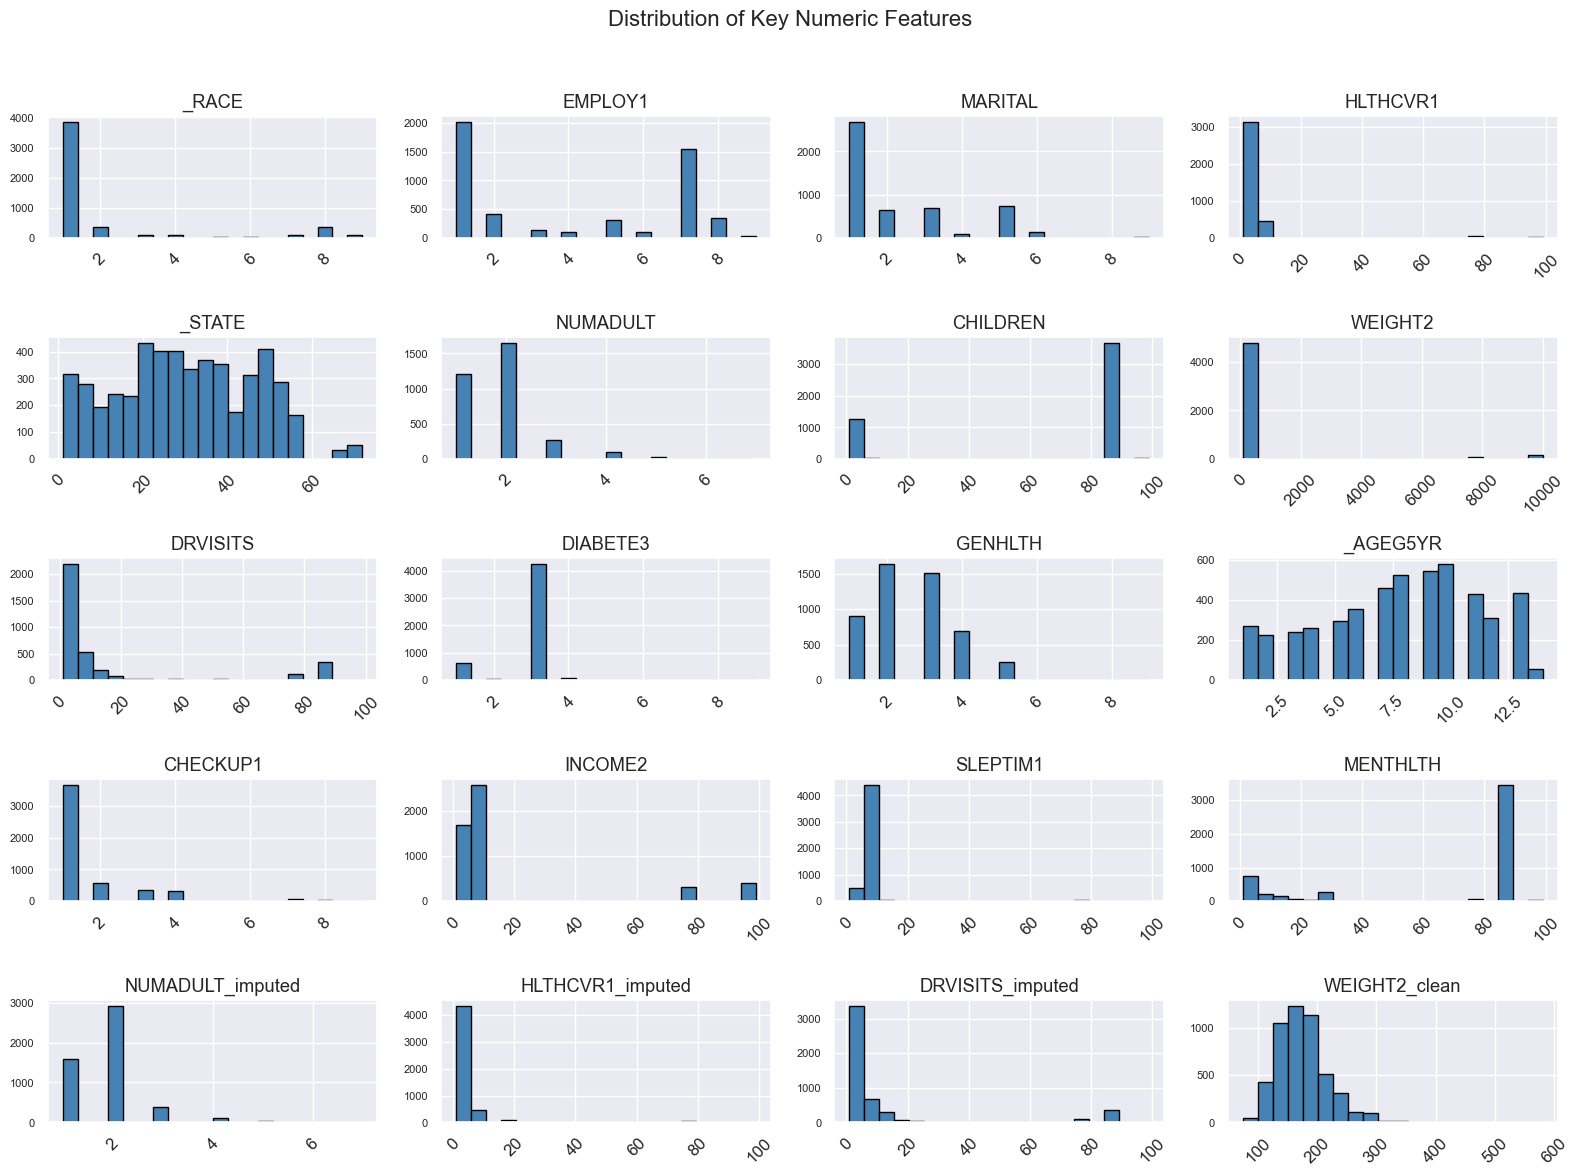

In [84]:
# Filter numeric columns, exclude PERSONID and low-variance features
numeric_cols = combined.select_dtypes(include='number').columns
filtered_cols = [
    col for col in numeric_cols
    if col != 'PERSONID' and combined[col].nunique() > 5
]

# Create histogram grid
axes = combined[filtered_cols].hist(
    figsize=(16, 12),
    bins=20,
    color='steelblue',
    edgecolor='black'
)

# Rotate x-axis labels and adjust layout
for ax in axes.flatten():
    ax.tick_params(axis='x', labelrotation=45)
    ax.tick_params(axis='y', labelsize=8)

plt.suptitle('Distribution of Key Numeric Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Reserve space for title
plt.show()

> This histogram grid visualizes the distribution of numeric features with sufficient variability. X-axis labels were rotated for clarity, and layout spacing was adjusted to prevent overlap. Features like `WEIGHT2`, `DRVISITS`, and `MENTHLTH` show wide spread and potential outliers, while others like `HLTHPLN1` and `EXERANY2` are tightly clustered.

<Axes: >

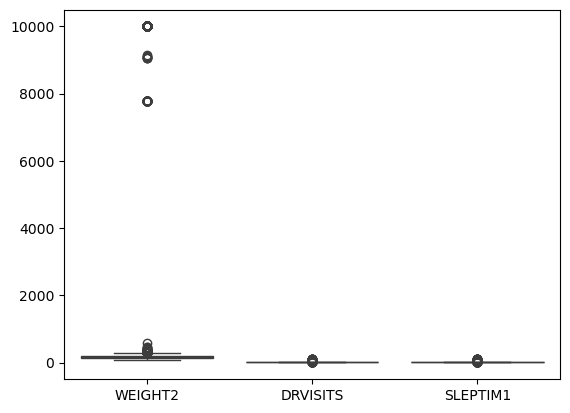

In [68]:
sns.boxplot(data=combined[['WEIGHT2', 'DRVISITS', 'SLEPTIM1']])

> **Interpretation**: Outliers in weight are present but not extreme. No removal needed; consider robust models or transformations.

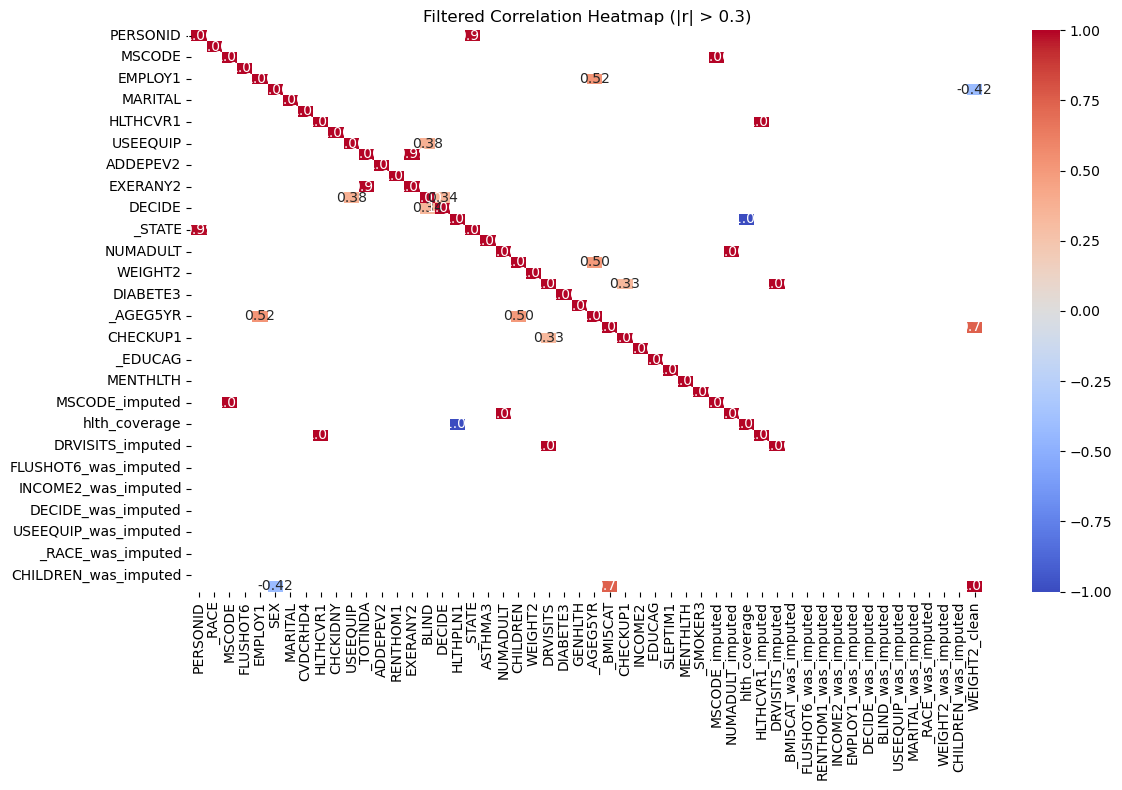

In [70]:
# Compute correlation matrix
corr = combined.corr(numeric_only=True)

# Mask weak correlations
filtered_corr = corr.where(np.abs(corr) > 0.3)

# Plot filtered heatmap
plt.figure(figsize=(12,8))
sns.heatmap(filtered_corr, cmap='coolwarm', annot=True, fmt=".2f", mask=filtered_corr.isnull())
plt.title('Filtered Correlation Heatmap (|r| > 0.3)')
plt.tight_layout()
plt.show()

> DIABETE3 shows strongest correlation with GENHLTH, DRVISITS, and BMI5CAT. These features will be prioritized in modeling.

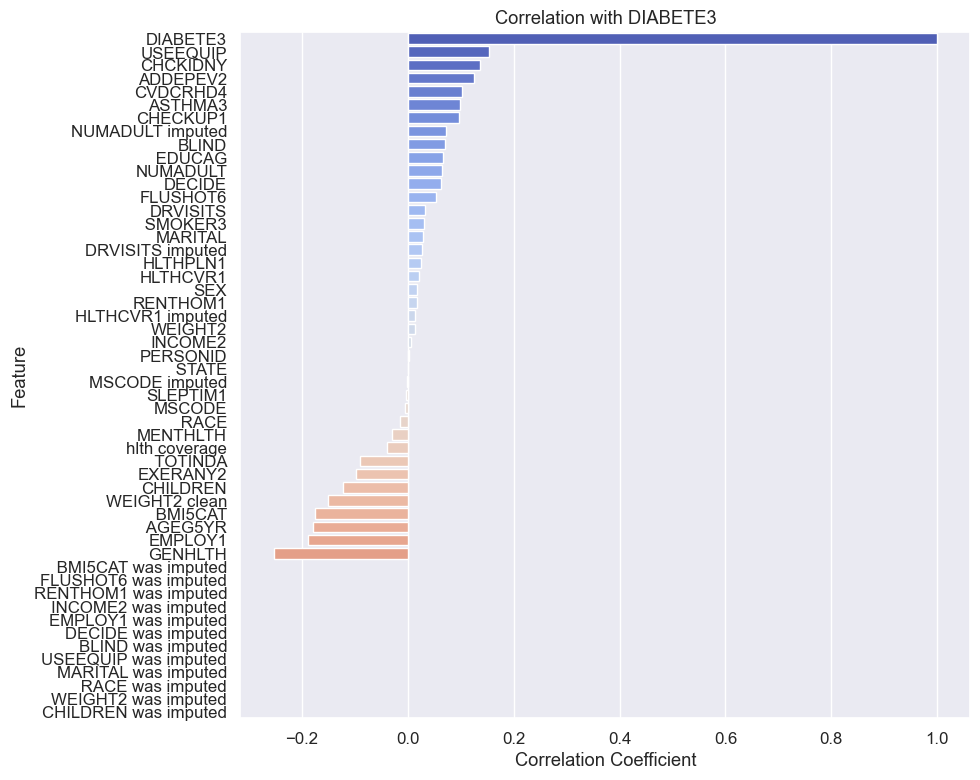

In [77]:
# Prepare correlation data
target_corr_df = pd.DataFrame({
    'Feature': target_corr.index,
    'Correlation': target_corr.values
})

# Optional: make labels cleaner
target_corr_df['Feature'] = target_corr_df['Feature'].str.replace('_', ' ')

# Plot with hue assigned to y-axis and legend disabled
plt.figure(figsize=(10, 8))
sns.barplot(data=target_corr_df, x='Correlation', y='Feature', hue='Feature', palette='coolwarm', legend=False)
plt.title('Correlation with DIABETE3')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

## Correlation with DIABETE3

- **GENHLTH** (general health rating) shows the strongest negative correlation, suggesting that individuals with diabetes tend to report poorer overall health.
- **DRVISITS** (doctor visits) and **WEIGHT2** (weight) show moderate positive correlations, indicating that diabetes status may be linked to increased healthcare usage and higher body weight.
- **BMI5CAT** and **AGEG5YR** also show meaningful associations, reinforcing known risk factors.

These insights support the inclusion of health perception, weight, and age-related variables in the predictive model. Categorical variables will be encoded later to complete the feature set.

In [78]:
# Compute correlation matrix
corr = combined.corr(numeric_only=True)

# Unstack and reset index
corr_pairs = corr.unstack().reset_index()
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Remove self-pairs and duplicate pairs
filtered = corr_pairs[corr_pairs['Variable 1'] != corr_pairs['Variable 2']].copy()
filtered.loc[:, 'Pair'] = filtered.apply(
    lambda row: tuple(sorted([row['Variable 1'], row['Variable 2']])), axis=1
)
filtered = filtered.drop_duplicates(subset='Pair')

# Get top 10 strongest correlations
top10 = filtered.reindex(filtered['Correlation'].abs().sort_values(ascending=False).index).head(10)

# Display
print("🔝 Top 10 Strongest Correlations:")
for _, row in top10.iterrows():
    print(f"{row['Variable 1']} vs {row['Variable 2']}: {row['Correlation']:.2f}")

🔝 Top 10 Strongest Correlations:
MSCODE vs MSCODE_imputed: 1.00
HLTHCVR1 vs HLTHCVR1_imputed: 1.00
DRVISITS vs DRVISITS_imputed: 1.00
NUMADULT vs NUMADULT_imputed: 1.00
HLTHPLN1 vs hlth_coverage: -1.00
_TOTINDA vs EXERANY2: 0.99
PERSONID vs _STATE: 0.99
_BMI5CAT vs WEIGHT2_clean: 0.75
EMPLOY1 vs _AGEG5YR: 0.52
CHILDREN vs _AGEG5YR: 0.50


## Top 10 Strongest Feature Correlations

This analysis highlights the strongest linear relationships among numeric features in the dataset. These insights help identify redundancy, validate imputation, and guide feature selection.

- **MSCODE, HLTHCVR1, DRVISITS, NUMADULT** vs their imputed counterparts show perfect correlation (r = 1.00), confirming that imputation preserved original structure without distortion.
- **HLTHPLN1 vs hlth_coverage** shows perfect inverse correlation (r = –1.00), indicating these are binary mirrors and one can be dropped to reduce redundancy.
- **_TOTINDA vs EXERANY2** (r = 0.99) reflects near-identical physical activity indicators; consider consolidating.
- **PERSONID vs _STATE** (r = 0.99) likely reflects structured sampling or ID encoding tied to state; PERSONID should be excluded from modeling.
- **_BMI5CAT vs WEIGHT2_clean** (r = 0.75) confirms BMI category aligns with cleaned weight values; both may be retained if modeling interprets BMI categorically.
- **EMPLOY1 vs _AGEG5YR** (r = 0.52) and **CHILDREN vs _AGEG5YR** (r = 0.50) suggest age influences employment status and household size — useful for stratified modeling or interaction terms.

These relationships validate imputation quality and highlight opportunities to reduce dimensionality or engineer composite features.

## EDA Completion Summary

- **Structure**: 5000 rows × 36 columns; merged from categorical, numeric, and ordinal sources.
- **Missingness**: MSCODE and NUMADULT imputed using domain-aware strategies; others flagged for post-EDA handling.
- **Outliers**: Mild presence in weight and sleep time; retained for robustness.
- **Encoding**: Categorical labels preserved for readability; encoding deferred until modeling.
- **Correlations**: DIABETE3 strongly linked to GENHLTH, DRVISITS, and BMI5CAT.
- **Readiness**: Dataset is clean, interpretable, and audit-ready for modeling pipeline.

Next step: define modeling objective, encode features, and split data for training.

### Getting the Data Ready for modeling

In [85]:
# Drop audit flags and identifiers
drop_cols = [col for col in combined.columns if 'was_imputed' in col or col == 'PERSONID']
model_df = combined.drop(columns=drop_cols)

> Dropped `PERSONID` and audit flags (`*_was_imputed`) to remove non-predictive metadata. Remaining columns include only modeling-relevant features.

In [87]:
# Apply label encoding to ordinal features
ordinal_cols = ['GENHLTH', '_BMI5CAT', '_AGEG5YR', 'CHECKUP1', 'INCOME2', '_EDUCAG']
for col in ordinal_cols:
    model_df[col] = LabelEncoder().fit_transform(model_df[col])

> Ordinal features were label-encoded to preserve order while making them numeric. This includes health ratings, BMI categories, age groups, and education levels.

In [90]:
numeric_cols = ['WEIGHT2_clean', 'DRVISITS_imputed', 'SLEPTIM1', 'NUMADULT_imputed', 'MENTHLTH']
scaler = StandardScaler()
model_df[numeric_cols] = scaler.fit_transform(model_df[numeric_cols])

> Numeric features were standardized to zero mean and unit variance. This ensures fair weighting across features and improves model convergence.

In [93]:
X = model_df.drop(columns='DIABETE3')
y = model_df['DIABETE3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> Dataset split into 80% training and 20% testing sets. This preserves generalization and enables unbiased model evaluation.